In [34]:
import re
import json
from flask import jsonify
import requests
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy
import dotenv

In [12]:
brent_url = r'https://api.stlouisfed.org/fred/series/observations?series_id=DCOILBRENTEU&realtime_start=1776-07-04&realtime_end=9999-12-31'
wti_url = r'https://api.stlouisfed.org/fred/series/observations?series_id=DCOILWTICO&realtime_start=1776-07-04&realtime_end=9999-12-31'
links = [brent_url, wti_url]

api_key_base = os.environ.get('FRED_API_KEY')
api_key = '&api_key=' + str(api_key_base) + '&file_type=json'

# Brent
brent_request = requests.get(brent_url + api_key)
json_item = json.loads(brent_request .text)
json_item = json_item["observations"]
df_brent = pd.DataFrame(json_item)

print("Brent")
print(df_brent.head)
print(df_brent.columns)
print(df_brent.shape)

# WTI
wti_request = requests.get(wti_url + api_key)
json_item = json.loads(wti_request .text)
json_item = json_item["observations"]
df_wti = pd.DataFrame(json_item)

print("WTI")
print(df_wti.head)
print(df_wti.columns)
print(df_wti.shape)



Brent
<bound method NDFrame.head of      realtime_start realtime_end        date  value
0        2011-04-06   9999-12-31  1987-05-20  18.63
1        2011-04-06   9999-12-31  1987-05-21  18.45
2        2011-04-06   9999-12-31  1987-05-22  18.55
3        2011-04-06   9999-12-31  1987-05-25  18.60
4        2011-04-06   9999-12-31  1987-05-26  18.63
...             ...          ...         ...    ...
9854     2024-11-27   9999-12-31  2024-11-19  74.32
9855     2024-11-27   9999-12-31  2024-11-20  74.33
9856     2024-11-27   9999-12-31  2024-11-21  75.09
9857     2024-11-27   9999-12-31  2024-11-22   76.1
9858     2024-11-27   9999-12-31  2024-11-25  74.27

[9859 rows x 4 columns]>
Index(['realtime_start', 'realtime_end', 'date', 'value'], dtype='object')
(9859, 4)
WTI
<bound method NDFrame.head of       realtime_start realtime_end        date  value
0         2011-04-06   9999-12-31  1986-01-02  25.56
1         2011-04-06   9999-12-31  1986-01-03  26.00
2         2011-04-06   9999-12-31  1

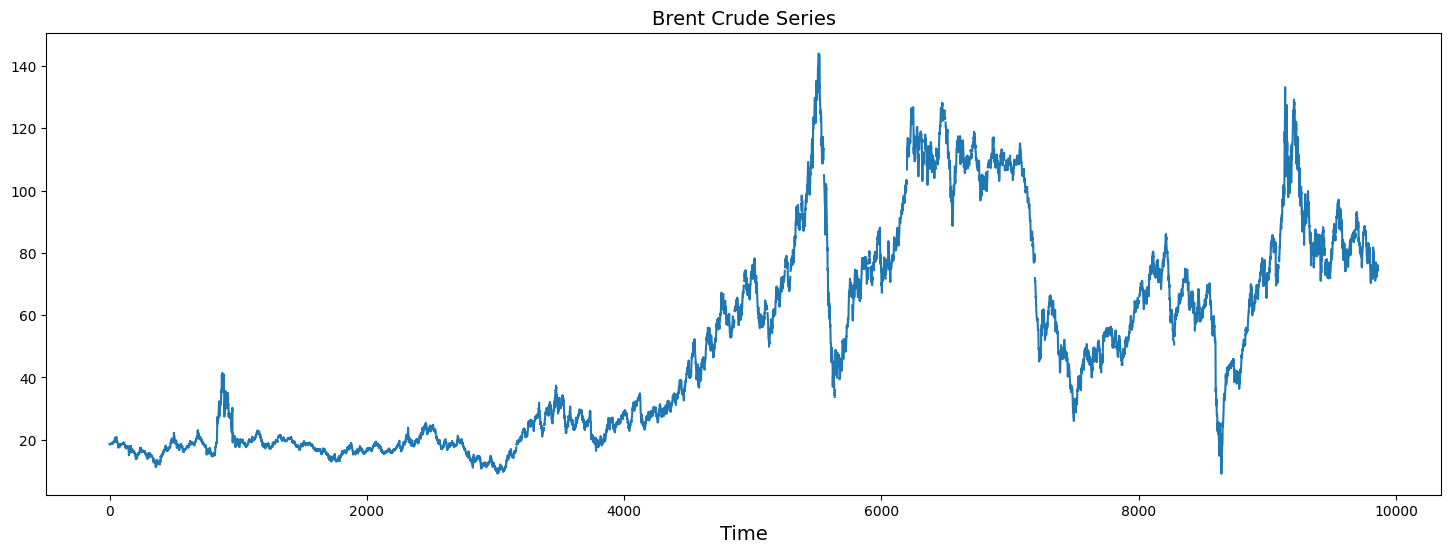

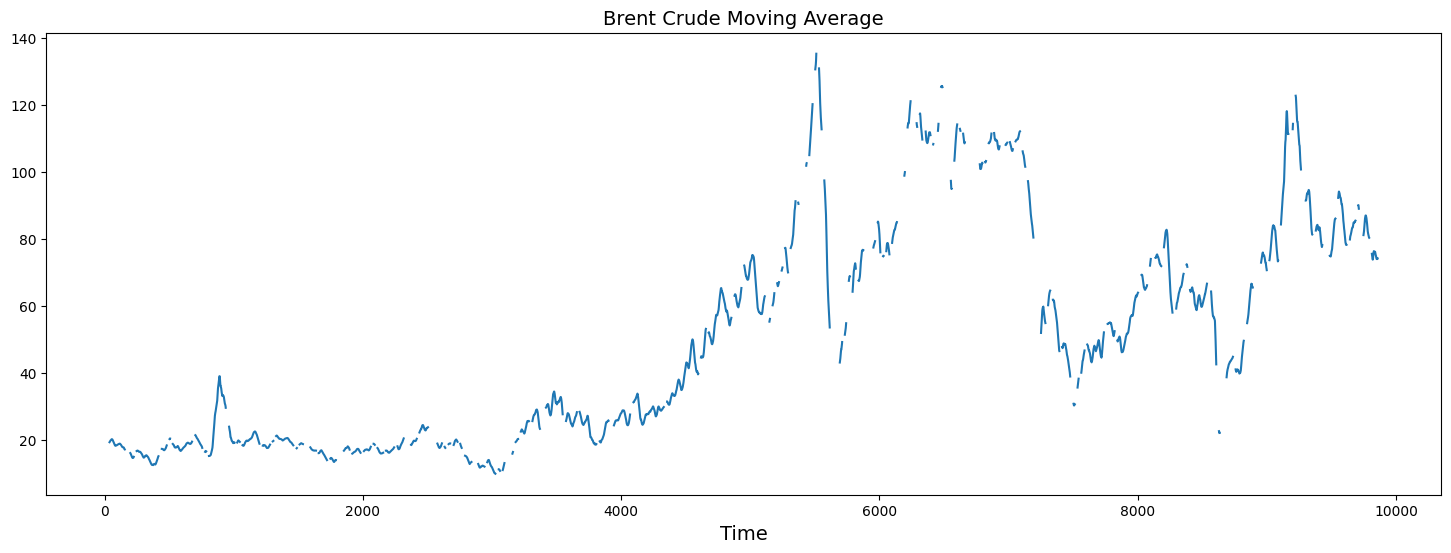

TypeError: Could not convert string '25.5626.0026.5325.8525.8726.0325.6525.0824.9725.1823.9823.6321.3320.6120.2519.9319.4520.8719.4519.6119.5818.9517.4215.5816.2816.6017.7016.7816.2815.7416.4316.03.14.7015.0814.1313.6314.6814.6814.6214.0513.2311.9811.9812.0313.1312.2412.9413.2314.0512.6012.5513.2814.0313.2512.7513.9512.2012.4312.0311.35.10.2511.1311.3511.7012.7514.3912.8313.0013.4513.6312.9412.7211.5011.7511.8812.4813.1313.7013.6514.2313.3413.6313.3813.8014.6514.3214.4315.1315.7015.8315.7515.6515.5315.6816.0817.1316.1815.5316.0416.95.15.1014.6514.5014.3013.8013.3513.1513.2112.7312.6112.3813.5213.6913.8313.6513.6513.6213.7314.4414.0513.9813.2313.1413.3812.8012.3912.0411.70.11.1811.1911.0011.1311.1311.2311.8512.6812.3012.8013.0710.8810.8310.9510.8311.0911.6311.7311.2311.5614.0014.3514.8015.1814.8314.9215.5015.2815.4315.8315.5814.9815.2315.2315.4815.4815.7815.8315.8315.93.16.4316.0316.1815.6315.6315.0014.9015.0515.0614.3113.8014.0314.5514.4713.9414.3014.5514.2814.4314.9314.7015.2315.3814.8614.8315.6015.3515.0514.98.14.5514.8314.5314.8515.1715.2214.8514.8814.9314.4014.1813.7315.0815.2514.7015.0514.9315.0815.1515.3015.3915.3315.5515.6815.6215.6515.5215.1015.1314.9815.0515.00.15.0015.2915.2215.1315.2015.1415.0114.9315.1215.4916.1316.3816.1115.8316.2816.5516.9516.9317.26..17.6517.7317.93.18.1317.9818.2118.2818.6318.7819.0018.8619.1319.0919.1318.7018.7318.6018.7618.5918.6318.4818.5618.6818.7318.5918.3818.2618.5618.4418.3718.4318.0318.0517.83.17.7817.4417.4817.8317.1516.7516.4316.9816.4516.4317.4017.4018.0018.1318.1318.2718.3318.4218.3918.6118.9418.7518.6118.7018.60.18.4818.6318.6518.6718.8218.7818.9018.6818.7118.6918.6818.6418.2618.0718.0918.4618.58.18.6618.9719.0319.0319.0118.8318.7318.6618.7618.8418.9319.1819.2219.0819.2819.4319.3719.3919.5619.8419.9119.9719.7519.9519.68.19.3519.3819.2819.3619.5519.7019.8719.7519.7919.9419.8419.8319.8519.9320.0720.2720.4120.5020.6520.4919.9520.1320.1520.3420.3820.2220.4720.6120.6120.9220.7620.9421.3221.3421.3821.6522.2322.4422.4422.2321.7521.7321.2320.5820.5021.3521.4921.4721.4322.2121.8221.3721.1721.0120.7021.0720.9620.7620.5319.8519.8419.7119.4719.2019.1819.3019.4919.6919.4419.7619.6119.6219.4819.3419.3418.9919.4319.7219.4219.6419.6619.7119.5819.5819.7719.3519.6619.6119.4719.4819.5819.6219.6219.8819.8119.3319.6819.7719.6719.6719.6619.7919.7720.2319.7919.7919.9320.1920.1820.0020.1520.1019.9319.9619.6419.3919.0919.0218.7318.6618.9818.9218.9318.8918.6918.2818.6218.5518.8719.3118.7318.63.18.6318.5218.4418.5918.8718.6818.3018.0618.5318.5118.3117.4716.7515.9715.9715.5715.1216.6016.6416.54.16.4616.9516.9716.74.17.7717.8917.7317.3017.3316.6316.7616.5617.1016.9217.2817.3017.2017.2116.9917.1116.9616.6416.9416.9716.8316.9217.1217.1717.3417.7017.3817.1217.1716.8416.8416.8016.6216.5016.7316.6416.8016.5815.8615.7715.9815.5715.6915.3515.6315.3515.5815.5216.0416.2015.5715.8116.0316.3916.6116.5216.0216.5816.7317.0717.0517.0817.0617.09.16.9916.7216.8017.0516.8717.8718.0618.1218.4018.3218.5017.9217.9318.3418.1318.3618.5418.3217.9118.1017.1217.3017.2317.4117.6317.5617.5017.4817.4917.5317.7017.7217.3917.4317.4117.0117.0417.3917.5417.4517.4517.5417.6017.6717.5117.2817.3217.3517.0916.7016.4316.8516.5616.6216.4316.0215.8216.0315.8616.0315.8616.0115.3715.2014.92.15.1115.4415.8315.4214.5614.6114.3514.8414.8515.8415.1615.7616.2816.2716.0915.9916.1816.0816.3716.0715.5715.2015.1215.3115.8415.5615.6515.7515.5415.5915.5115.4615.5915.7715.7515.7115.5515.3315.3515.2415.3915.1915.0514.7914.7914.2514.2914.5114.1414.4814.5515.3814.8614.5014.7215.0815.1915.2514.2614.1614.2214.0713.9113.3313.0313.0312.5812.6212.9913.5913.6314.0214.2614.9015.1614.6315.3314.4414.2212.9413.3613.4513.6713.7913.5413.5213.7813.8914.0414.0813.7013.8813.9913.9914.2514.0313.6813.3013.4713.7314.7814.1114.1115.4314.9315.0015.4215.6315.6915.3615.5115.8015.4815.9016.0815.9316.3316.3916.8116.2417.6817.2717.3616.63.16.9817.0316.8117.12.17.3816.9917.4517.5617.7417.8018.1618.1118.4918.8819.0319.2019.2818.8517.6617.9618.2317.6817.7417.3217.0017.5017.7217.5117.3817.5517.4917.4217.1117.6117.6018.2318.3518.6018.6018.6418.5018.4918.0618.1618.2118.3018.6818.6718.7318.1218.5718.5318.5319.0519.4719.8419.8620.3419.5320.0820.2120.16.20.5519.9320.2021.0320.2720.0320.5920.0719.8520.0320.6520.5620.6620.2620.6821.2321.7422.6624.6223.3820.6421.3221.2020.8320.3820.6619.7320.1320.5720.0819.4119.5419.5620.1320.1220.5320.5820.1520.2520.5820.9221.7719.6819.4619.5519.5519.9619.9319.8320.1820.5020.3819.7019.9419.8719.3019.5020.3720.5619.9820.8819.8819.7419.5319.7120.2820.3820.0420.2720.2920.5520.2920.9820.3520.7820.3820.7520.2020.4220.3620.4920.2119.8319.9219.8618.7618.5218.3218.1517.9618.3317.9118.2818.1818.0517.9118.0618.2318.5818.4618.6018.7818.9918.6718.8219.1019.0119.1519.0218.5318.6918.5918.8518.8318.8818.8819.0819.4119.4019.7719.7719.6819.8719.7319.9619.8719.6819.6819.6919.2119.4919.6219.6119.9920.1519.9920.1520.1719.9519.8920.0420.2120.1820.4920.9120.6420.6820.5820.3720.0419.6719.7019.6019.4819.7919.7419.8820.0920.0120.2320.0619.9719.9719.6219.8419.6219.5819.6919.8819.9320.1320.5219.8019.8019.8419.6519.3319.4019.8720.2620.2420.2220.4620.4520.4120.6920.8020.7520.6721.1322.2022.1721.5821.5321.31.21.9121.7821.6021.84.22.8823.8123.4123.0721.6422.2522.9023.1523.1722.3622.6122.1122.7823.7022.5722.3423.4324.4822.5622.7922.2922.6922.7123.0422.4422.3622.4022.1121.8222.0221.8822.1222.8622.4622.4622.2021.8721.4021.1321.8121.6221.5521.1921.3621.6221.3020.9320.8020.4220.2620.1520.0720.3820.0919.6019.3419.5919.8520.2820.4820.3620.0920.0320.3420.5120.2319.7819.4819.1518.3217.5618.1917.76.17.8717.3716.9517.9317.9018.6017.8517.4918.5018.5718.5018.7618.6317.9817.9818.3018.2619.0119.0318.9619.7319.5219.0518.8918.7818.2617.5116.2516.0216.12.18.0017.8817.4717.5117.0916.4116.9116.6516.7816.8217.3917.6017.1116.6415.9215.5515.4316.0916.5016.1517.1216.7017.1817.0516.9416.7316.7316.5016.4916.6317.0517.4518.6918.3718.6718.2318.5719.0719.6119.8819.8419.3320.3320.0720.2420.5721.5923.7123.7928.7329.6026.1925.6926.3827.0726.7026.5427.4028.6528.6328.4630.5231.6731.1027.3627.7326.1526.9627.4527.4529.3030.0031.5130.0930.8330.2930.8531.2031.7933.7333.4833.1834.4436.2139.0538.3339.1239.7739.5337.0834.4337.0436.7637.8738.8840.7339.3041.0739.4238.0039.3436.0337.0333.8228.4629.9530.8034.3533.0335.2834.9335.3135.3033.9532.0532.4135.4835.6133.9132.0833.3031.1831.0529.9131.4529.5030.0830.0832.3533.2833.0533.2832.9329.0829.4029.0527.1826.3526.6127.0826.5025.3026.4526.6027.1027.8528.2627.5027.0826.95.27.3526.9527.5828.48.26.5325.6124.8827.2527.5028.0027.5527.4330.1330.3532.2521.4820.0521.6324.9124.0825.6324.1521.0321.7321.0821.9021.3321.2320.7021.4821.3321.7822.4422.7822.3822.2520.7320.7320.0820.1818.4817.4317.4318.4819.0319.2819.4320.3320.5019.7819.3319.3419.0020.0620.4820.0519.8819.7820.6820.4020.7819.8819.4719.7819.4519.63.19.2819.3819.4819.9820.0320.2820.5821.0820.9821.5421.8521.6021.7321.0821.1621.6821.0321.0020.9521.2821.3020.9921.2821.1721.4321.7321.7221.8321.9221.2520.8920.7321.0420.9121.1921.3920.9520.8520.9521.04.21.3421.0421.3021.1621.1620.9020.4520.3820.2819.8419.8520.0819.7119.7019.9720.1119.9920.2220.1019.9220.0320.1220.4120.5620.7820.9220.6920.6920.9121.2921.3521.4321.3221.7421.5021.7022.2021.9722.1621.7421.2521.4121.1121.4821.3821.5521.7021.3321.3521.5021.3921.3821.6021.6421.7121.5221.3021.3921.2922.5022.3021.4421.9321.7821.9821.8621.7722.0222.28.22.2821.7621.7521.5621.3621.4421.6621.5121.7121.8421.7321.8721.7922.0222.2022.2422.1122.2322.4222.2522.1022.3422.7022.6422.9923.0223.1823.0123.1923.4823.8923.6723.9624.1224.0323.4723.1423.4723.1823.2423.0923.1123.2923.8523.8223.7823.4423.2923.0022.6622.5822.2822.5522.7922.3821.8822.1721.9321.8522.1521.0421.3821.3821.4821.1020.6120.7520.4219.8719.3919.2419.5419.9420.0919.7819.4519.3919.1218.2818.5818.68.18.6318.8218.6319.15.19.4319.2219.2418.7217.9517.8918.2618.7718.4018.8318.9419.1118.9218.5018.7318.3818.7519.3519.0918.9218.9518.9318.9719.2619.5019.4819.9119.6919.3619.2919.7019.4219.4218.1418.4218.5218.6018.3718.3018.4418.7718.6918.3618.6718.6218.5818.5318.6518.6218.5018.8619.1619.1519.2719.0519.2718.7818.9119.0619.0019.3119.1919.2519.4919.8519.7920.2520.4420.2920.6420.3320.4520.2419.8119.9320.25.20.2620.1719.9219.9120.0520.3120.2920.7720.8820.8821.1320.7820.7920.7320.8521.0220.9820.7520.5620.7020.5420.1220.2020.7920.79.21.8022.0021.9722.1322.0722.2022.4522.5322.6522.4322.2322.4922.3322.2822.3822.2322.3022.2322.1622.4722.7423.0322.7322.4222.2721.8421.9022.0822.0821.8721.5121.3821.3821.2521.3821.4221.7321.8021.5621.7821.9121.9922.1121.9522.0922.0321.9821.8221.8321.6021.2321.1821.4121.2721.1221.0021.1321.3521.3121.4721.5421.3321.4021.1921.8521.6021.2421.1421.3021.4621.7221.6521.6921.7721.7721.9822.0021.9322.0022.3522.1322.3922.2321.9621.9121.7821.7821.5721.5121.7821.6621.8321.8321.9321.7621.8521.8921.9921.9922.2822.1222.1622.3722.3122.1821.8821.4921.2221.1121.1421.0321.1720.7120.6820.7720.6020.3320.6220.2620.6320.5420.4620.1920.0420.3720.3220.2120.5020.3720.0120.0620.29.20.2919.9119.5619.3819.0818.9519.1718.6918.8619.2619.0919.0618.9419.4219.6819.8119.9219.7919.9719.97.19.7719.6219.6319.49.19.0319.1319.0318.9218.9018.7818.2118.5118.7118.8918.9418.4018.3518.7118.6419.5119.6719.6620.3820.2720.3220.00.20.2920.2720.0720.1220.2020.2919.96.19.5919.3019.4419.6920.0820.4920.2820.6320.5320.6220.4820.4621.0520.8520.6320.7120.4220.1220.3820.1820.0420.1420.2920.0519.5219.9819.9720.1220.4220.2720.2720.4420.5420.6720.5920.3320.3520.22.20.4320.2820.3820.2120.0919.9920.0519.9919.7919.9319.8320.21.20.6320.5420.5820.4020.4620.4920.4320.4220.3820.1919.8019.5119.5119.3219.1519.5619.6019.4319.7519.9220.0520.04.20.2020.0519.7719.7919.6019.6519.6619.2718.9918.9018.6018.8718.7018.7118.6318.3518.4418.3618.8318.8918.9918.8218.4417.93.18.2918.0617.7917.9218.1218.0517.4317.7317.2917.6817.2017.6017.5717.6718.1118.5018.2518.1217.9417.9017.8117.8217.5417.3017.5817.5817.8718.1618.1417.8417.9517.6817.6418.0918.4218.3818.4518.4018.8218.6318.2417.9217.9717.72.17.1417.0016.9716.7416.9816.9416.8516.8517.1017.6818.1217.5317.5217.5217.5218.0718.7318.7218.6318.4018.4318.4318.4918.5318.7618.7018.6518.5018.2418.1318.0418.2518.2817.9217.3617.5517.6617.3016.9717.5017.0317.4717.3817.0916.6916.7116.5416.9116.7216.7816.6917.0816.6716.5516.6716.3915.73.15.5315.3015.3615.4514.9315.0314.5714.5314.6114.6515.0414.5014.4714.3914.2113.9814.2014.3214.6114.48.14.0914.1114.4514.19.14.5214.6615.3015.3615.3314.6514.9514.3614.5614.8115.1514.9215.2514.9514.8515.0915.2615.5015.4815.3715.2415.9116.0615.9715.6315.3115.1214.6414.5914.7114.1514.1313.8914.2614.21.14.2814.1814.8214.4814.5014.7814.8014.7414.5714.1414.1714.2314.1914.4714.5214.8215.0314.8314.8815.3715.0414.9415.2115.1914.1514.4114.4014.78.15.6715.6715.7715.5915.5715.8615.7415.9616.2016.5816.6416.4316.6517.5617.8417.6616.8216.7016.5716.9217.1816.9316.8517.2817.7417.7217.6217.8418.2718.2017.9917.6118.0218.4918.9318.6918.4017.8317.7618.02.18.3018.2918.2518.1118.1017.7818.2818.6718.4818.8218.9419.7519.8320.7220.6820.0819.5919.3819.2818.9619.1418.8219.3719.52.19.6219.3019.1519.4820.1720.4020.1420.1819.8919.3819.4919.1519.3219.5919.4219.2619.4619.8720.3020.6520.2220.0620.1419.3719.4119.2918.9618.6718.0518.2417.6418.0817.7317.5616.8717.0917.5417.4917.1417.6217.4017.6017.4717.52.17.6217.8417.6217.5317.3917.0016.7216.7216.8417.2117.2417.0617.6517.7617.6817.4817.6917.9618.3618.1617.9718.0118.2418.2717.9517.7417.1317.0316.9817.1117.3417.4317.5717.3117.5017.7118.0118.1718.2518.1618.6618.9018.9718.7618.3818.4618.1618.1818.0717.4817.5817.3817.6317.4717.4317.7018.05..18.1017.9718.0617.7717.0016.8816.9316.8617.1417.1216.9216.9816.9616.6016.8416.9116.9817.0717.1517.41.17.6317.7417.6917.77.17.4517.5617.7617.6917.4017.4217.7017.7217.5217.8918.4718.7218.7018.4618.1618.5318.8218.2317.9518.2018.4818.4818.5418.7818.5818.4318.3618.2818.4718.2918.4418.4618.6318.94.18.8618.8418.5918.7018.6418.5218.3118.4018.6318.5618.5918.3017.9817.9218.1917.9018.1218.1818.2718.5818.4418.9118.8518.6819.0818.9519.2119.1719.1819.0519.1119.5719.7419.6719.6119.8419.5019.16.19.8020.1420.4020.5220.4620.1320.3120.1820.4820.3620.5320.1819.8820.3020.3320.3219.6719.7619.4019.5519.9120.0119.9419.9920.0619.8619.8119.3419.1218.70.18.7818.8818.8919.1419.2519.1619.0818.9418.8318.8718.9319.0518.9018.8018.2318.0117.5917.7617.8117.6717.9517.9817.5917.3817.33.17.2117.4217.1417.3517.3117.4917.2517.3217.2817.3317.3317.0317.0717.1717.4517.4717.5117.4317.6217.5917.9517.7217.7417.6517.8617.7717.9117.8617.4817.4017.5917.6517.8718.2618.5418.7919.6019.9117.8417.8717.7417.8918.08.18.4918.2718.2718.4418.4918.7618.5318.8718.9418.9219.0118.5317.8917.2717.3817.4717.6417.7217.5417.6717.5617.3216.8617.0317.3617.2917.2817.0817.3817.6017.5917.5717.3417.4417.4817.6117.5817.6117.5417.6717.6717.7417.9417.9317.6817.6217.8217.8317.8317.7817.8917.9218.1618.5618.1417.8917.93..18.3718.2818.2718.2718.4318.6118.6618.7618.6918.9718.6218.8019.0119.1419.5119.7119.0518.8718.8319.12.19.2519.4919.4719.54.19.8319.9019.9620.2620.5019.8619.6618.8718.2818.4218.1218.5819.1218.9418.4918.5818.9518.0617.6817.3317.6517.7617.6317.8317.5317.7417.7117.7917.8318.0118.9618.8619.0219.16.21.0721.6322.1420.9719.4519.6519.3019.5919.4519.2419.6520.1619.8719.6619.9220.4220.4921.1821.9923.2324.5622.7422.4422.8523.2322.3821.6421.4521.4322.2922.6822.2222.75.23.0123.2324.0825.1524.2925.1324.4824.6723.4723.9623.9424.3924.0024.3522.3322.0720.9520.8120.7821.1921.0621.0721.1320.6521.0121.2321.3521.2820.7920.6422.2821.9523.0222.3521.58.21.1020.6519.9519.7719.8620.2819.7320.0620.2820.1820.1320.1320.0320.2821.4321.5320.7320.6820.3820.1020.1320.6320.9820.9221.4821.0821.38.21.6521.3321.5221.5621.9621.9022.4322.2821.6521.6820.9521.0521.5820.9721.0520.1320.2820.2820.4620.9521.3521.2521.0821.3521.4521.6022.2522.3522.1021.9522.6023.1022.5322.1522.4822.2321.5521.3521.7522.2022.25.23.3523.2523.4523.8523.7524.1524.7524.9524.5023.3023.4023.8523.4523.6023.8324.5524.6024.0524.6024.2024.3524.0524.8524.7525.2525.4525.0024.3024.6525.5025.4525.1025.4025.8025.8525.7924.7824.5524.8024.7524.1524.4023.2523.0022.8022.6522.7522.8023.6023.3523.4024.2524.3524.1523.8524.5023.7523.9024.1525.7523.7023.70.23.7024.7024.8025.0025.6025.6025.1524.2523.4023.7524.4525.7025.7026.0526.5526.1026.4025.05.25.1025.2025.3525.90.25.5525.5526.2526.2526.5526.3026.1525.2025.1025.9525.4525.4025.1024.8024.4023.8523.8523.8523.9024.5024.8024.1524.2024.0023.9023.0522.3022.4522.3521.7522.1022.40.22.5022.6521.9521.6021.0020.9521.1020.8020.3020.2520.7520.5021.0021.3520.5020.1520.6020.6521.3020.9022.0022.0022.0021.7021.0020.9520.6520.70.20.3520.3019.5519.4519.1519.2519.3519.2519.5519.5019.9019.6019.3519.5019.9020.3519.6019.6519.8519.8019.8520.4020.2019.9019.6019.6019.7019.6020.3520.4521.4021.1021.3521.3022.1021.5021.2021.6021.6021.25.20.7520.7021.1521.0021.1520.3520.3019.8019.0018.8518.8518.7519.0018.9519.1019.3018.9018.7518.6018.9018.7119.1218.8419.4219.8220.1120.3919.48.19.5319.6719.4019.2219.3918.9219.8119.5719.9219.2219.2519.2519.6819.7119.7119.6720.0820.4320.1920.2720.8120.7920.4620.0919.5819.7319.9120.1920.0220.0819.9420.0420.0719.8319.7019.2919.3119.6519.5919.66.19.7319.6519.4619.6119.4319.5019.5019.4119.3719.3019.6719.4419.4119.3719.6119.7120.0320.3820.8721.2921.1321.0221.8222.8621.9721.8822.1922.0122.0121.3420.7520.6520.9821.4120.6920.6821.4421.1820.9921.0320.4020.8221.2621.1020.9120.6420.4420.4620.8020.4620.5420.5320.7621.0120.2920.0119.8219.1719.7619.4119.3519.13..18.7618.6718.8118.4918.7218.8618.7918.1518.1818.2118.1818.1918.2218.5118.4618.2918.3918.36.18.1917.6417.6017.65.17.4116.9516.6416.9117.0116.6516.5316.4416.5416.3516.48.16.4316.0515.9315.6516.9617.0617.3517.9317.2117.0716.4316.4216.6316.7216.5916.4816.1715.9716.03.15.6416.2416.1216.1315.2315.1415.2815.4115.4415.3215.2815.3315.3414.9014.5814.5414.3014.4014.1913.4113.6714.3614.4314.3116.1415.5216.6916.9216.8416.3215.7515.6916.0416.0815.4815.3915.7115.61.15.3515.1815.6415.9715.4915.5215.5715.0713.0913.2315.4315.9015.4315.5616.2515.9815.4815.4515.2615.2115.2615.2115.0115.1514.5114.1513.0113.3614.2114.81.14.9014.9814.8815.2114.9914.8114.9415.2415.1314.4913.7613.5412.6712.6611.6912.3812.5511.8011.8013.5414.6514.5413.9014.2114.2914.3014.4714.58.13.8713.8314.0114.0113.9614.0614.8714.9014.5414.0213.4413.8314.2913.9713.9314.3714.2014.1314.2514.2713.9313.6913.8013.8713.8513.1112.8712.7613.4413.4013.2613.1313.2113.6213.4413.7813.9013.6713.3513.5413.2913.6213.7214.7014.59.14.3414.3714.7114.3914.4614.7214.6015.0715.5315.5815.7315.8015.9915.8015.7416.0116.1915.5215.7115.2415.6015.0314.5714.6414.4714.2714.0914.0814.1613.3913.4514.1414.0014.0614.3914.1914.3514.3114.4814.4514.2414.0913.9313.9313.3913.5413.6314.0413.5712.8112.4612.3312.2112.2012.5111.4810.86..11.3711.2711.3111.2511.2011.6111.3311.2010.8210.8611.3011.6412.5511.0510.9510.8610.9911.1211.03.11.5911.8211.7512.14.12.4212.0412.8412.9913.0613.4312.9112.3312.2312.21.12.1311.8212.4512.6212.4112.1612.4012.5212.8112.3612.2112.4211.9411.8511.6511.6611.8811.9411.90.11.3811.4911.9711.7911.9712.4412.4912.6112.3112.2812.6612.9213.3213.3313.6313.7814.7414.3014.5114.4814.6015.1115.1115.2615.3915.3615.1815.6616.1616.4616.6616.6616.65.16.9416.7916.0215.9216.5916.4416.7316.5116.8517.3417.8217.7918.0518.0217.9617.6717.8218.4318.5318.6918.8318.9418.8918.2318.2318.5717.8417.4418.1118.0417.7617.0916.7717.0417.2216.7717.2517.3217.1816.85.16.3116.6116.8117.3617.9117.6617.9817.8218.4518.2418.6117.9218.2518.0117.7917.6218.4218.2618.1718.2218.5619.3319.3919.70.19.7819.9819.7619.9419.9220.3319.8920.2620.6620.2819.3819.5419.8420.4120.4920.4020.6121.0920.5220.4620.2120.4920.6720.8921.2621.3121.5421.4221.6721.3421.7021.5421.8621.6621.6121.3620.6621.0921.3121.9322.1521.7921.5422.00.22.5822.6423.2423.5524.1823.8624.1024.5224.7224.3224.4824.2624.7624.8124.6324.5224.6924.5424.5123.7123.3723.2422.4620.8121.5822.9322.9322.4622.8122.4422.3622.2122.7423.4823.2223.1722.7121.5921.7922.4422.4922.5923.1722.9323.2824.2124.3724.3324.9125.3126.0426.5725.7126.6128.0326.9127.22.27.2225.8424.8725.0125.8825.7126.6726.3626.6926.0025.2125.3725.8726.2826.7426.7626.5526.3425.5125.86.26.3626.8126.4125.76..25.5624.6524.7924.7924.7125.6926.3026.6328.01.28.9829.1129.6729.7129.2530.2827.6627.2227.2727.6528.2827.5228.2628.6728.4028.0528.7129.4929.5130.3030.1730.0129.3729.51.29.6330.1930.2330.3430.1130.5731.7131.5131.4632.1933.9031.2231.6131.7632.1131.9330.4731.1030.8629.3328.0127.2827.4727.8627.5927.1026.3626.6726.8626.2825.4625.7625.5124.9723.9124.1725.4925.2925.4826.0625.9227.3827.29.27.4126.4124.6925.5325.7125.8426.8626.6027.0827.3728.0528.4628.1029.2529.6429.9529.7629.3830.2830.0228.6228.6129.8930.4329.76.30.3629.0330.1930.3429.8729.7829.2929.7830.2231.7632.7332.7232.7032.3531.5733.0733.6434.7234.7631.5632.0131.8632.7332.44..30.7630.1930.2629.5129.6130.3431.4131.3130.7131.9431.1030.9428.5627.9727.8927.8128.2128.2227.5027.8528.2728.9229.9428.9329.2630.3831.0931.0231.9231.4331.9131.8831.9732.4231.2431.2333.4134.0132.9232.7333.2533.0933.42.33.9234.9735.1833.6235.1434.2533.8734.3735.8736.7536.9637.2233.8432.6631.5031.7831.2330.2630.8732.0531.8630.9130.6630.8631.9833.2933.2036.0634.9633.1833.3633.5133.0634.3134.9034.5333.6233.7532.7832.8632.7033.1432.5932.6233.0233.4432.9233.8734.0534.3034.7235.5434.8435.6235.9835.5436.06.36.0636.2434.0234.5833.6132.0631.2829.2530.2429.3628.3129.7529.8128.7528.0628.8629.5229.3425.8326.0626.16.27.0026.5525.8226.72.27.2927.9327.9528.0227.4427.7229.4229.4230.07.30.1929.7730.4232.1232.2131.6631.4631.6129.7929.0729.1228.6229.8831.2730.5530.2731.2731.5730.9330.5230.1229.5528.9629.22.28.6028.6428.5228.8328.2728.2627.3527.7827.8928.6128.4028.9528.3127.9727.9127.4526.4926.5626.6826.1725.9926.4326.1927.3127.4027.6226.4326.4726.3725.7026.6527.1627.2427.0727.4528.4728.4228.75.28.8127.8927.8327.9227.0026.9725.2425.9328.4728.3528.4828.3727.8928.6628.4127.7927.3528.3928.5028.5928.8328.9028.7729.0229.9029.9629.7528.8527.9728.08.28.7628.7128.3927.8828.1427.8427.5627.9128.4328.9429.1328.8129.1228.5227.5527.4926.5226.8527.0227.1126.9725.6725.7526.3726.0226.28.27.0728.1027.6327.2227.0726.8526.5726.0225.3324.6524.6525.6725.8826.1826.7126.7426.9826.6026.7026.8327.8627.5127.7028.1727.6227.7228.1227.8528.1027.5127.4726.6527.2027.9327.1725.6328.3426.6927.1627.0726.6526.65.26.9427.0327.5427.9927.6627.6527.6428.5829.5928.8427.8126.7326.6025.4621.4621.6322.4022.8023.4423.1222.7022.1722.7022.3222.2522.5522.5123.4922.4922.3722.0121.8921.3321.9921.7821.2822.0021.7522.0722.1021.8321.2020.4720.2420.0019.9320.1121.2122.2321.2621.5619.6317.5018.0917.7418.7118.38..18.6919.5719.3718.5519.4620.2719.7119.6218.6919.0818.3218.0418.3818.2019.3119.2819.3819.3718.6719.30..21.3221.0720.4219.96.21.1320.6521.4721.4220.8220.3220.4819.6718.8818.9918.9618.2018.02.18.3619.1019.5719.8020.0519.3019.1119.7120.4020.0220.0619.7719.7520.2521.2920.7621.1921.1921.47.20.7720.3120.8120.9220.2421.3721.4021.7822.3722.5523.1823.3223.6223.8724.3624.5524.1424.4824.4725.0325.0224.9225.7425.5625.6925.7525.7926.21.26.8227.7527.5526.6426.2126.1625.4526.1524.9323.5124.5324.9225.9425.8626.4326.2826.2826.2826.3627.1227.4527.3226.5826.3126.7526.1126.7927.7627.7827.9228.6229.1728.1728.0028.1928.2427.3527.0126.6026.69.25.0825.6424.7825.3725.1025.3225.0224.8924.7224.2424.2124.7925.5425.9025.9825.3625.5725.6225.5126.3126.0626.6726.7726.7926.7926.8326.82..26.1426.1626.7327.0127.4827.2327.6827.8827.5027.8326.6126.6126.7826.6726.5526.5427.4327.0226.5126.8726.5527.1826.5826.6726.8727.8428.3528.1928.9929.2429.8630.1230.3730.1129.9929.2328.8428.3128.8328.97.27.7628.2829.0629.5129.8029.6229.7728.9529.8329.1429.0829.5729.4929.6530.8530.7930.6930.3130.5330.5930.7130.5929.7329.6529.6529.5629.3128.9629.3630.0629.7329.2829.6129.5628.3127.9328.1927.8727.0927.2526.8126.8527.1827.0426.8926.0625.7225.3625.8326.0226.1925.2825.4025.5026.7126.4127.0027.0727.7327.0126.6026.87..27.2727.3426.8027.2727.0327.2927.7327.4928.2028.3930.1530.0430.4130.5730.5732.0932.13.32.6132.6831.4131.21.31.9733.2632.2931.2030.6631.9531.5932.0832.4233.2333.5833.88.34.6234.3233.9034.9832.4332.7033.5433.7833.5132.8433.6133.9134.3635.0534.4635.4335.8336.6336.61.36.8837.0236.4536.7637.2936.0637.9636.8336.7636.1036.9536.8637.2137.7637.1836.8137.8736.0535.4134.9231.5530.0128.6227.1829.5133.4228.7130.3130.2131.1429.4828.5529.0528.4127.7627.9728.9327.2028.2828.4129.4629.1630.10.30.7629.9228.0427.5225.9225.2525.3226.0926.0525.7426.4325.6526.2426.9427.6527.3428.5129.2128.5729.0728.8429.2929.5129.0929.74.29.2428.4629.1529.5630.7230.7829.8130.8431.2631.3631.7232.1731.4130.6331.1431.0830.2829.8630.6330.2230.0531.6528.9729.1830.1530.4130.2930.39.30.0830.3230.8731.0431.3331.2031.6031.2031.4431.9631.6730.2030.1330.7230.3129.9830.2130.6930.5632.2331.8032.3431.7732.4132.2331.9131.9130.8530.8531.0130.8130.7630.9631.7831.6431.4332.0131.1831.4131.76.29.5729.4328.8728.9328.8529.2229.4128.8628.2628.1527.6027.0027.2626.9326.9727.0028.1928.2928.2128.3529.1929.4329.8330.3730.4030.4829.6030.9732.0131.9131.6831.7431.5130.6130.3730.1930.0030.3129.9929.9529.5728.9528.6729.2428.8128.8630.2930.2530.7331.0131.2131.3731.8932.3131.7533.1632.8432.8732.2629.9930.0230.33..29.8930.7430.6131.2430.6832.0831.7231.9232.0133.0633.1732.9433.3633.7232.8131.7132.0332.99..32.5133.0132.51..33.7133.5433.5734.2734.3834.9234.2634.6233.6135.16.36.2135.5335.1234.9434.4133.9933.6332.8633.1634.0234.2033.0633.2632.4932.9134.0333.9334.0334.51.35.1335.4235.8135.8035.7535.8537.2835.4536.0836.8536.6035.8036.8137.3136.5336.2936.2136.9536.2137.4437.3638.2137.8138.0937.1237.8137.0635.6735.6135.4136.1535.7534.4734.3934.2935.0936.2837.14.37.7937.0936.6237.7437.7037.4637.6136.6137.7037.2237.0237.4937.2337.5037.3138.2638.8639.6939.4139.9838.9040.3040.3040.9441.4241.5340.3241.6140.9239.8342.0341.4540.6039.2539.90.42.3339.9639.2938.4438.7237.1837.6038.45.37.5837.1837.3338.5138.6837.6938.1137.5637.8137.3436.2535.6036.9238.5638.37.39.5639.1840.2739.9039.3039.5540.9840.7041.1041.5540.8640.6341.5141.8241.4541.8342.8142.6943.7243.8344.1342.7344.3943.9544.8644.5144.7245.5246.6146.0246.7547.3648.6647.6046.0045.6843.8343.0643.1142.3242.2343.8944.0443.94.43.1842.7744.5342.8443.8644.6243.8344.0345.6346.3347.1148.4148.3748.8649.5649.7649.5349.5650.1649.8551.0851.9852.5653.4053.6553.4953.8654.6954.8953.5953.2854.9354.5155.8355.5256.3752.5250.9551.7850.1049.6050.9048.8049.6549.1047.4048.7047.5047.3046.9546.1046.8546.3048.9048.4848.7449.14..49.7149.1645.5643.3142.5642.9641.5141.9642.4140.7141.0641.7644.2144.1646.3145.5745.7644.0542.19.41.2641.7843.6943.36.42.1643.9643.4145.5145.3245.3145.6646.4648.1148.41.48.4647.6147.0148.3148.6149.4348.8048.8047.1548.2547.1046.6546.4046.4545.3545.4045.4547.0547.1547.5047.3048.3547.5048.45.51.0051.7352.0552.2051.7551.6753.0053.6053.7053.9054.5554.7553.5254.4054.9055.0556.5056.4056.8056.7055.9549.4349.70.54.0654.2653.9655.3157.2656.8655.8355.8854.1653.4653.7151.5450.2151.1150.6150.5252.3352.4552.4954.1653.1654.3351.3751.9249.2050.9449.6050.2251.1251.3052.0451.7650.3948.8348.6548.6448.9746.9947.0047.2548.6849.1450.3750.8951.65.52.0854.4053.4655.0854.4653.8452.5154.3653.5555.4755.0355.5356.4858.4059.1958.9058.2759.2359.6359.7858.3257.2356.6359.11.59.7161.2460.7659.7159.2360.4960.0057.8358.3657.1257.6156.7357.3157.7558.1659.0559.1259.9160.7161.5161.8760.7661.6062.4463.9263.1364.8065.6766.7166.2166.1163.2963.4765.5165.4665.8167.1067.2966.0567.4169.9168.6369.5066.91.65.8364.3864.8064.2163.2963.1865.2064.6462.9167.2166.2466.9667.0764.6765.9864.9466.3666.8366.2165.3663.7462.5661.8161.8160.7163.8464.1363.0562.6164.2662.9462.1161.0461.0560.6362.8360.8561.0361.3059.8059.8559.7561.7060.6059.4059.7059.6557.8057.4557.6057.0557.8556.2056.3057.7558.3058.35..57.3656.4657.3358.4659.3159.9159.9659.2160.6659.4161.3661.3660.8660.0158.0157.3157.8158.5658.0858.08.58.1659.8160.2661.06.63.1163.4162.8164.2163.5663.4163.9163.9663.86.66.3665.7666.8668.1668.0666.8365.6065.8067.8168.3667.8666.6164.7165.4165.1163.0162.5162.6662.0161.2659.6157.6158.6159.76.61.2159.0358.0361.4661.0161.3762.0163.3663.6162.4661.5160.0660.5159.9161.8163.0162.1163.4662.8160.3160.4160.0362.1363.9063.7565.6566.0066.7066.2566.0765.7566.7667.2267.0268.2969.0368.5369.53.70.3071.2872.0771.9673.7370.1967.4371.7170.7671.8073.7574.6272.2669.9870.0969.7570.7172.1573.0071.8769.2569.4068.6569.6368.4469.2370.7869.4770.9271.35.71.8571.4270.1172.7372.5072.4370.9070.2571.6270.2868.4869.1269.7869.7569.2169.3070.0770.6270.5071.6372.0572.1573.5073.94..75.2075.0073.7673.5074.0574.9976.7076.8075.7073.8772.7974.0073.5274.2973.4673.8274.5073.3074.5674.9376.1675.5974.7877.0576.2976.2874.1774.3873.3372.9571.6470.1270.9372.4572.5571.4572.0272.1370.4769.7470.2070.3869.24.68.7067.7567.3766.3065.4263.8164.0963.2763.3063.8461.7760.0061.6259.7960.7460.6362.9662.4662.9060.9658.6459.5360.0259.6859.9358.5057.5658.2358.6959.9158.9157.6658.5557.3556.7457.5559.0960.2760.7558.4158.7258.6457.8759.1360.1158.9459.9361.1859.6658.5958.2858.7956.2355.9056.4258.0157.28..60.3060.9762.4562.9763.4362.3962.4062.2062.5462.0661.2661.0661.3462.4863.4062.1962.8763.0862.0561.81.61.0760.3160.3960.85.60.7758.3155.6556.2956.0855.6553.9551.9152.96.51.2352.3050.5151.9851.1153.6154.2453.4955.3854.0157.0358.1757.3559.0158.6958.9157.7559.7659.8657.7658.9858.0057.9259.38.58.3259.4060.2860.2861.4161.4661.7861.9761.5860.0560.6661.8561.6360.0658.9458.0358.1557.5257.0656.6556.4156.9860.2161.0761.7762.9864.1166.1065.9466.0364.5964.4064.26.61.5161.9261.9863.8763.6363.6363.1463.1461.8163.5665.3364.1065.3365.0866.4565.7864.4363.7863.2361.8961.4862.2661.5461.8562.3562.5563.1662.5764.8364.9366.2564.9165.1063.6264.59.63.1963.4764.0265.0966.1765.6365.9766.9364.7865.9365.3666.1767.6268.0469.0669.1568.5068.3568.8568.8367.7868.9869.6170.4771.1171.41.71.8172.8072.1472.8072.5872.5573.8974.1174.0375.0375.9075.5374.6573.3875.7474.9677.0376.8278.2076.4976.8475.4172.0372.2572.2371.6271.4971.6072.4073.3670.9971.9071.1269.4969.3069.8671.1771.9871.7973.5273.3773.98.75.0775.7476.3476.7077.5378.1679.8580.0579.1480.5581.5181.9983.8583.3882.5181.2080.3182.8681.6480.3180.0079.9781.4881.2078.9780.2381.3083.0583.7386.1987.5887.1989.4888.5887.6086.4588.3092.0991.7393.4590.3394.1693.5395.8194.0696.6596.4695.5196.3694.4091.1894.0293.3794.8195.7599.1698.57.98.2497.6694.3990.7190.9888.6089.2988.3187.4590.2588.2387.7290.1294.4192.3591.3190.6989.9391.1190.8893.1994.00.95.8996.6396.0395.95.99.6499.1797.9095.0896.4395.6493.9292.7494.2391.8790.8090.1190.55.89.6487.6589.9890.3790.9991.6692.3491.6789.0390.0788.3287.1688.0791.7793.5692.8293.2895.4295.57.99.99100.8698.5799.0399.40100.8399.59102.60101.78102.4299.72104.45105.51105.12107.90108.73109.86110.21110.03105.74109.57103.25102.57.101.70101.78105.83107.56105.59101.54100.92104.83103.92106.09108.91108.54110.89110.07110.14111.71113.77114.80114.80116.56117.48119.17119.28117.10119.64118.78115.67113.70112.60116.36119.94121.82123.56123.77125.94124.02125.83124.21124.25126.50127.15128.93132.99130.04131.58.128.81131.00126.70127.35127.75124.33122.30127.93138.51134.44131.38136.43136.91134.84134.52133.99136.54131.88134.78135.98136.49133.92138.91139.69139.96141.06143.74145.31.141.38136.06135.88141.47144.96145.16138.68134.63129.43128.94131.43127.25123.73124.62122.59124.72122.21126.74124.17125.03121.45118.71118.57119.84115.42114.44113.10115.96115.05113.46112.92114.39115.48121.23114.48114.85116.31118.17115.58115.55.109.63109.38107.99106.47106.35103.23102.66100.95101.1995.5291.4997.3997.50104.05122.61107.85106.84111.54106.7796.29100.7098.2393.8493.9188.1590.1888.9486.5077.4481.1778.6974.3869.8171.9074.0871.2966.9267.1763.3461.9262.8067.4565.7968.1063.9370.4165.4160.7261.0662.1959.3855.9558.3157.1855.1454.4253.6448.8649.2253.6350.0254.20.55.2149.3447.0546.7943.8041.0143.6942.0043.1047.7746.2744.6143.8440.1736.7333.1731.1030.2832.94.37.5839.8938.9544.60.46.1748.6148.5642.7541.6840.6937.6537.7737.4335.4135.38.38.5742.5642.3345.1246.5041.6742.0441.5841.7341.3540.8740.2741.1540.2439.5837.5435.9334.0337.63.34.9634.6739.6039.3537.6638.8641.6443.1844.1540.0741.5745.2843.5445.4347.0145.6842.4646.9146.2247.3348.9748.1251.4651.5553.0553.3652.2453.8752.4148.4949.6448.4652.6152.5251.1049.1349.3752.24.50.2249.5149.2649.9750.3645.8246.6547.4148.4650.6549.2949.0150.1950.3552.1854.4553.8156.2956.6758.5857.7958.8158.0058.5856.5258.9959.5261.4560.4961.15.62.4863.4165.0966.3168.5968.5866.1468.8068.4368.0570.0271.3872.6972.1370.5470.4771.0771.4269.6067.0968.8168.1469.7069.1671.4769.8269.3266.68.64.0662.8860.1560.3659.9359.6959.6261.4962.0763.5663.9364.8164.5866.1066.9668.3467.2463.4266.9069.2671.5971.4071.9771.9670.9770.5969.4670.0870.5767.5166.7269.2272.5472.4073.1273.6871.6071.3872.4972.7269.9768.1168.0367.9067.95.71.0871.2771.9569.3468.8670.8172.5072.4871.9569.7471.5068.7465.7465.9166.6966.5670.4670.6769.8070.2670.7169.6071.6971.7573.2474.1075.2077.5578.5479.4778.8781.0380.8280.1178.6179.4577.3979.8477.0478.0879.5880.3079.6477.4079.4479.0179.1677.2576.3478.9179.0879.5577.4776.8376.4974.8877.25.75.9577.1978.3976.6276.4275.4173.8972.5970.6770.5469.8669.4870.6272.6472.5873.3072.7173.4876.0376.83.78.6778.8779.3579.39.81.5281.7483.1282.6082.7482.5480.7979.6679.3577.96.78.9877.4275.8474.2574.9074.6773.6473.6272.8574.4177.2176.9673.1371.1571.8773.7174.4875.2374.11.76.9877.2778.9779.7780.0478.6179.7577.9979.7278.7179.6280.9180.2181.5081.8581.5082.0782.1081.2679.7981.7582.9382.1680.5881.2681.6880.2980.2579.7581.9282.1483.4584.53.86.3686.5485.6485.1784.6084.0783.8085.6285.2582.9781.5282.9882.7882.8984.3484.2082.4383.2285.1786.0786.1982.7380.0077.1875.1076.8976.3775.6574.3871.6170.0869.3869.9168.2868.0368.2364.7871.5274.5674.00.72.7072.8874.6271.4371.5571.8874.3875.4873.8974.9976.8477.6776.8277.1877.8477.1575.9075.9678.4578.2675.9375.5972.9572.06.71.9674.0575.4676.0874.9377.1677.0276.6775.9676.5377.3276.2779.0178.6878.9377.4677.0678.3078.8581.2582.5282.4982.0080.6781.4680.2478.0975.6875.3975.1775.7675.3974.4573.4572.7171.2472.0773.3675.1774.6971.9373.9774.9974.52.73.9874.6574.2576.4077.1776.7875.9274.5873.6374.8172.9672.9873.4074.6376.5176.1577.8579.9581.5781.4382.8383.2181.3482.6682.1881.6783.0382.7181.2383.0679.5781.9380.0381.1582.0082.6081.9082.2081.4582.9483.9184.4586.4986.8587.0787.0487.7787.7784.8984.8882.3380.4381.8881.6581.2480.7983.21.83.8785.7384.1286.7587.9889.1889.3388.6988.3088.3587.8188.6288.3388.6687.7188.0288.6889.3089.8390.84.90.9991.4891.1389.8591.3891.5989.3990.3088.3788.0789.2491.1191.8591.3991.53.91.3890.8588.5688.2286.7485.0886.1584.4588.1590.9989.5489.7889.4287.8786.3085.8585.5985.4484.3983.6683.1383.8085.0585.03.92.6596.0495.8396.5297.1099.63102.27101.92104.34105.37105.06104.39102.73101.14101.2097.2397.99101.47101.06102.36104.53105.21105.04104.89103.54104.34103.80106.19107.55108.14107.82108.38109.82112.27109.50105.75106.60107.73109.17106.70107.18110.84111.72.111.68111.72112.31112.38113.39113.03110.60108.7999.8996.87100.32103.3997.8898.5399.2196.9196.4099.5297.9999.1597.0699.13100.78100.18100.58.102.70100.30100.41100.2899.0799.18100.77101.9599.3097.2099.3794.8394.9593.0293.2393.7094.9690.7090.8990.6592.9094.8595.3094.81.96.9296.6798.7096.2095.1697.4198.0495.7597.2495.9497.4998.1198.9699.5398.9799.6197.4097.4895.6894.9893.7891.8786.7586.8981.2779.3283.0585.4885.1987.8886.6587.5882.3882.3384.4285.3584.9985.1585.3787.2788.9088.8188.9388.9386.45.85.9989.3489.0589.0587.2488.1990.2188.9189.4089.4087.9685.7086.9285.7780.2980.2979.5879.9784.1880.9481.8781.8778.9377.3475.4079.4182.3282.7085.1485.5485.3083.9686.8086.3888.3486.1186.0787.1991.1292.9890.2093.9693.3293.1992.1992.5194.0794.2695.5296.8095.7497.7898.9998.1499.37102.5998.8297.6796.7397.7696.16..96.9198.2199.79100.36100.20100.20100.97100.99100.94101.28101.25100.49100.4598.3498.3599.4199.4097.77100.14100.2494.9594.9293.8793.8493.5393.5593.8893.8697.2497.1698.5499.4699.4299.6199.72.101.34101.2999.3699.4499.6599.6898.83.102.96103.22101.81101.56101.31102.24100.8999.0398.69.100.70100.61100.3298.1599.4798.8499.2399.7699.4798.7598.4697.6396.3697.8096.8998.5598.8099.8898.68100.39100.82101.82102.33103.27.105.88105.99107.44109.39108.49106.59107.08108.76106.68106.70104.71106.16106.65107.40106.34106.70105.49105.19107.03108.09105.68106.87104.98106.43107.07107.32105.40102.79103.03105.25104.02101.53103.29.102.45101.12102.66103.69102.84102.92104.23102.65102.38103.58102.68103.10103.72104.56104.86104.89106.17105.25102.5698.4997.8697.1396.8097.1096.0394.7593.9792.7892.5391.5192.5791.4489.4090.3690.64.90.7587.7986.5283.1783.9584.3185.0584.7884.0882.5883.3582.5683.8384.0383.2683.9981.0677.9179.3378.7679.3480.2777.7285.0483.7287.74.87.1184.3785.9383.9285.8886.0287.1588.4189.0789.8892.7891.5687.7788.2888.8089.4090.1389.8088.0888.9987.2291.4092.3093.6893.3993.3992.9492.7693.4094.3595.6696.0096.0396.5596.8995.8795.7895.5496.3095.5094.6196.47.95.3495.3795.5896.4196.5297.0397.0298.3098.9496.5195.2591.9792.1492.6491.6891.0789.9291.8992.1892.4491.8888.1991.6989.87.89.4392.4291.2492.1991.8391.8492.0792.0492.0090.0088.3086.6585.3985.5985.8485.5285.6586.2387.0584.9085.6488.6284.5085.0786.0885.5685.3886.3285.4586.6289.0586.4687.08.87.0187.2886.8186.1087.6488.5488.6988.0487.3685.4785.4585.1485.3686.3585.3986.3286.7187.4689.0989.7688.2088.29.90.7190.9190.6691.83.93.1492.9793.1293.2093.2193.0893.8193.6094.2793.2694.2895.4995.61.96.0995.0695.3595.1595.9597.6297.9897.6597.4696.2196.6896.4495.8495.7197.0197.4897.0397.3095.95.96.6994.9292.7993.1292.7492.6392.8492.0390.7190.1390.8890.4791.5392.0192.0792.4492.4793.0393.4993.7192.4493.2192.4693.4194.5595.9996.5397.24.97.1097.2395.0293.2692.7693.3694.1894.5993.4491.2388.7588.7386.6587.8388.0488.8189.2191.0793.2792.6394.0993.2290.7493.7095.2595.8095.2896.2496.0995.8194.7693.9693.9594.8595.7296.2995.5593.9894.1293.84.94.6593.1393.5791.9393.4193.3693.6694.7196.1195.8295.5095.9896.6697.8397.8698.4698.2494.8993.8195.0795.2595.4797.0096.3697.9499.65101.92.103.09103.03103.46106.41104.77105.85106.20105.88106.39107.94108.00106.61107.13105.41105.47104.76104.61103.14105.10107.93106.94106.61105.32104.41103.45106.04106.19106.78106.89107.43107.58107.14104.90103.93104.93106.48105.88109.11110.17108.51107.98.108.67107.29108.50110.62109.62107.48107.65108.72108.31106.54105.36108.23106.26104.70103.62103.22102.68103.10102.86102.36102.09104.15103.29103.83103.07103.54101.63103.08102.17102.46101.15102.34100.72100.8799.2897.6396.9096.6597.4098.7498.2996.8196.2994.5694.5893.4094.7494.2594.5695.1393.1293.9193.7693.8093.0393.3593.3495.3594.5393.8693.4192.05.92.5593.6195.8396.9797.1497.48.97.1098.3297.2597.2196.2797.1896.9997.5998.4099.1198.6298.8798.85.99.1899.9498.9098.17.95.1493.6693.1293.3191.9091.3692.3991.4592.1593.7893.5493.96.94.5196.3597.2396.6695.8297.4997.3498.2597.5596.4497.2497.4097.8499.98100.1299.96100.38100.27100.31.102.54103.46103.20102.53103.17102.20102.93102.68102.88105.34103.64101.75101.82102.82101.39100.2998.2998.5799.2398.43100.08100.7199.6899.97100.0599.66100.61101.25101.73101.5799.6999.60100.29101.16100.43102.57103.55103.37103.68104.05103.70103.71104.33.104.35101.69101.47102.20100.85101.13101.56100.0799.69100.0999.7499.81101.06100.52100.32100.89102.01102.63101.74102.31102.95102.80104.31104.03105.01105.01.104.78103.37104.26103.40103.07103.34103.27103.17103.32105.09105.02105.04107.20107.49107.52106.95106.64107.08107.95106.83106.64107.04106.49106.46106.07106.06105.18104.76.104.19104.06102.93103.61101.48101.73100.56101.88103.84103.83105.34104.59103.81102.76105.23105.68104.91104.2998.2397.8698.2697.3496.9397.3497.6198.0997.3697.5795.5497.3096.4494.3596.4093.9793.6195.3995.7895.8296.4497.86.92.9295.5094.5193.3292.6492.7391.7192.8992.1892.8694.9194.3393.0792.4391.4691.5593.6093.5995.5594.5391.1790.7491.0289.7690.3388.8987.2985.7685.8785.7381.7281.8282.3382.8082.7683.2580.5282.8181.2781.2681.3682.2581.0680.5378.7777.1578.7177.8778.7177.4377.8577.1674.1375.9175.6474.5574.5575.6376.5275.7474.0473.70.65.9468.9866.9967.3066.7365.8963.1363.7460.9960.0157.8155.9655.9756.4354.1856.9155.2556.7855.70.54.5953.4654.1453.4553.45.52.7250.0547.9848.6948.8048.3546.0645.9248.4946.3748.49.46.7947.8545.9345.2644.8045.8444.0844.1247.7949.2553.0448.4550.4851.6652.9950.0648.8051.1752.6652.66.53.5652.1351.1249.9549.5648.4850.2547.6549.8449.5950.4351.5350.7649.6149.9548.4248.0647.1244.8843.9343.3944.6344.0246.0047.4047.0348.7551.4148.8348.6647.7250.1249.1349.13.52.0853.9550.4450.7951.6351.9553.3056.2556.6955.7156.3755.5856.1756.5955.9855.5657.0558.5559.6259.1058.9260.3860.9358.9959.4159.2360.7260.5059.8959.7359.4457.3058.9660.1858.8858.88.57.2957.5157.6960.2560.2461.3059.6758.0059.1158.1560.1561.3660.7459.9659.5360.0159.8960.4159.6260.0161.0560.0159.5959.4158.3459.4856.9456.9356.93.52.4852.3351.6152.7652.7452.1953.0551.4050.9050.8850.1150.5949.2748.1147.9847.1747.9748.7748.5347.1145.2545.7545.1344.6943.8744.9443.1143.2242.2742.4541.9342.5840.7541.0040.4538.2239.1538.5042.4745.2949.2045.3846.3046.7546.02.45.9244.1345.8544.7544.0744.5847.1246.9344.7146.6746.1744.5344.9445.5544.4045.2445.0644.7545.5446.2848.5347.8649.4649.6747.0946.7046.6346.3847.3045.9145.8445.2244.9043.9143.1943.2145.9346.0246.6046.1247.8846.3245.2744.3243.8744.2342.9541.7440.6941.6840.7340.7540.5539.3939.2740.8941.2241.22.40.5740.4340.5839.9341.0840.0037.6437.4637.1636.7635.6536.3137.3235.5534.9834.7234.5536.1236.7637.62.36.3637.8836.5937.13.36.8135.9733.9733.2933.2031.4230.4230.4231.2229.45.28.4726.6829.5532.0730.3129.5432.3233.2133.6631.6229.9032.2931.6330.8629.7127.9627.5426.1929.32.29.0530.6830.7729.5931.3731.8430.3531.4031.6532.7434.3934.5734.5635.9137.9036.6737.6237.7738.5137.2036.3238.4340.1739.4739.9141.4538.2838.14.37.9936.9136.9136.9435.3634.3034.5237.7437.3039.7440.4642.1241.7041.4540.4039.7440.8842.7243.1842.7641.6742.5245.2946.0345.9844.7543.6543.7744.3344.5843.4544.6846.2146.6446.2247.7248.2948.1248.1647.6748.1248.0449.1049.0049.36.49.1049.0749.1448.6949.7150.3751.2350.5249.0948.8948.4947.9246.1448.0049.4048.9549.1649.3446.7045.8047.9349.8548.2749.02.46.7347.3745.2245.3744.7346.8244.8745.6445.9345.2344.6444.9643.9643.4142.4042.1641.9041.1341.5440.0539.5040.8041.9241.8343.0642.7841.7543.5144.4745.7246.5746.8148.2048.4846.8047.5446.2946.9747.6446.9746.3244.6843.1744.3944.39.44.8545.4747.6345.8846.2844.9143.6243.8543.0443.3443.8545.3346.1044.3645.6044.6547.0747.7247.7248.8048.6749.7550.4449.7649.7650.7250.1450.4750.3549.9750.3051.5950.3150.6150.1849.4548.7549.7148.7246.8346.6645.3244.6644.0744.8844.9645.2044.6243.3943.2945.8645.5645.3745.6947.4848.0746.72.46.72.46.7245.6645.2949.4151.0851.7051.7250.9549.8550.8451.5152.7452.9951.0150.9051.9352.1352.2251.4451.9852.01.52.8254.0153.8053.75.52.3653.2653.7753.9851.9550.8252.1953.0152.36.52.4551.1251.3952.3352.7752.3852.1453.2453.1852.6352.7553.9053.5553.8153.0152.1952.3752.9953.8452.9653.2153.1153.4153.41.54.0253.6154.4853.9954.0454.0053.8252.6353.3353.1952.6849.8348.7548.0547.9547.2448.3448.3048.3447.7947.0247.2947.0047.3047.0248.3649.4750.3050.5450.2550.9951.1451.6952.2553.0653.3853.1253.19.52.6252.4650.4950.2649.6448.9049.2249.2248.9649.3148.8347.6547.7945.5546.2346.4645.8447.2847.8147.8348.8648.6449.0449.3650.3250.8151.1250.9948.5749.58.49.6348.2948.3247.6847.4048.1345.8045.6845.8246.1046.4144.7944.4744.7344.2443.3442.4842.5342.8643.2444.2544.7444.8846.0246.02..45.1145.5244.2544.4045.0645.4846.0646.5346.0246.4047.1046.7345.7846.2147.7748.5849.0549.7250.2149.1949.6049.0349.5749.3749.0749.5948.5448.8147.5947.5746.8047.0748.5947.3947.6548.4547.2447.6546.4046.4645.9647.2647.32.48.6349.1349.1047.4448.0648.2149.3049.8649.9049.8849.5450.2950.5850.3351.8551.5952.1451.6251.6750.5950.4450.050.7949.3449.5850.9351.350.6151.4351.8651.8752.0551.2951.6351.9152.3251.9752.4153.9254.1154.3654.3254.5555.6357.3457.1956.8257.1656.7556.7755.6755.2855.1456.2156.2156.8457.88.58.9458.157.9657.2557.458.3557.4857.6655.7956.557.1557.8457.1256.5957.057.2957.1757.4958.0958.3458.25.59.5559.6759.8460.46.60.3761.6161.9861.4961.7362.9263.663.8164.22.63.8263.9263.9663.3863.6664.4565.6965.6266.2765.7164.6464.8265.9265.564.1863.4861.9161.359.259.4159.3360.761.4861.89.61.9161.7362.7263.5263.8162.9461.4360.9861.1962.4962.5461.0960.1362.0261.3560.6960.8961.1662.2962.0163.3765.164.2565.865.4965.2164.364.87.63.0563.4163.3563.5362.0363.465.4866.8167.0767.3566.2366.568.4468.368.2667.6167.6668.068.1868.1168.5667.2867.9168.4569.7170.7468.8371.1671.3670.6971.0171.3471.4371.4771.2372.2672.0971.8570.7767.92.66.868.2466.9865.8164.7665.5164.7565.9665.7766.166.3866.6366.9165.0165.9165.0965.9265.6869.0269.9175.2377.4173.4574.1373.8974.19.73.0573.7873.9374.1170.4770.2871.0368.2268.0368.7869.4270.3167.970.7771.1371.5968.6671.1969.8868.868.9568.4969.0169.1766.9266.8167.6167.2567.0465.0765.4465.9366.567.3267.8569.1369.7169.9768.5469.6870.2569.8470.25.69.8268.6967.8167.7367.5569.2970.3768.668.9868.8669.8771.0870.7770.873.2373.472.2272.1873.1675.3775.1676.474.4474.2674.2774.9573.1870.9771.4171.8471.9369.6368.6369.1669.2566.4966.5667.2567.5867.066.1865.3163.6763.1263.1262.1661.6960.7160.1959.8555.6356.1656.4556.4957.1653.3954.41..51.4651.3150.0651.4650.7852.9853.2152.6451.5452.7651.0751.6551.0452.6951.2649.846.1247.9645.6445.3845.38.45.38.46.0444.4845.15..46.3146.9247.7648.2749.5852.1952.4251.4450.3151.852.0851.8353.651.83.52.5952.4452.9453.5351.7953.0754.1853.8455.2954.5753.6953.9452.6852.7552.4353.1453.8454.455.5855.58.56.1256.956.9557.0155.3255.456.9257.2155.7656.656.5556.2256.655.7756.7956.8958.2758.5958.5159.0959.1260.1259.9858.8758.7159.8759.3959.2960.1961.5962.5362.4662.1263.164.3764.0564.6263.6163.8663.4364.0163.7464.02.65.6666.2465.9665.2363.2963.3963.8363.5561.7561.9862.361.4162.1361.5861.6560.9761.8262.0362.9362.7763.1263.0261.4257.6558.458.4.58.9158.8456.4753.4953.2553.551.5752.5953.9553.3353.351.1352.3852.4751.9453.8653.7456.8857.3557.7357.6359.1759.1858.258.9156.057.06..57.3557.5760.2859.9359.9959.357.4456.555.0855.4255.8756.5855.955.8856.0456.8558.0458.5353.6455.6754.6353.651.1452.654.4154.9857.0555.1654.5154.8356.2456.1855.6555.3354.0853.5454.9955.7656.6755.0755.07.53.9156.2256.3356.4557.8857.3755.6655.1354.7663.159.2658.1958.1957.9258.6957.2256.3856.2455.9554.0953.652.6752.4152.8452.7652.6452.6353.5754.7653.5752.8153.4253.8953.7553.2854.2155.956.1156.5255.655.3454.8554.0256.0456.3357.0456.1556.9157.0256.61.56.6756.8856.5757.5456.8254.9356.7158.3657.6857.7958.2558.12..58.1255.9756.1558.4658.4259.258.9959.2258.7459.1860.1160.2160.8860.9361.360.4360.5161.17.61.17.61.7261.7661.6661.14.61.14.61.1763.063.2762.759.6559.5659.0258.1758.3457.8658.5258.55.58.2556.7655.5154.0953.0953.3353.2952.1951.5850.0649.5950.8750.9450.3449.5950.051.1351.4152.0352.03.52.153.3153.7753.3651.3649.7848.6747.1744.8346.7847.2746.7845.941.1445.941.1431.0534.4733.1331.5631.7228.96.26.9628.9626.9626.9620.4826.9620.4820.4825.0920.4825.0925.0919.4825.0919.4819.4823.3319.4823.3321.0323.3321.0320.7516.615.4814.120.5120.2825.1828.3626.2123.5424.9722.9.22.3620.1519.9619.8218.31-36.988.9113.6415.0615.9912.1712.415.0419.2319.7220.4724.5623.8823.6824.7324.0225.7625.3727.429.4431.8332.333.5634.333.49.34.732.833.6735.5735.4936.8837.3337.4239.4938.1738.9839.5436.4336.2437.0738.2637.9138.7939.7240.640.437.9138.6638.5339.6739.2739.8840.57.40.5140.5940.9139.6440.5640.0640.341.240.7440.5540.8341.7641.8840.9941.2341.4640.8941.1339.8540.140.8341.6742.2541.9341.1641.9441.5342.642.2642.0542.8942.8942.9142.6242.3242.4443.1743.2142.8842.9642.6142.7642.7641.3939.69.36.8738.0537.2537.3337.2338.2940.1740.9941.0939.2639.5539.9240.1140.0640.4739.0340.0538.5136.939.1240.5239.8241.0440.4439.2240.0340.8640.8440.740.6941.3739.8840.4639.7338.3939.3437.2735.9435.6436.637.4438.9738.5636.9740.0541.1841.2340.939.9341.1441.2441.6441.5741.9942.9144.7145.58..45.244.5445.2345.6546.2345.7245.6445.4846.7646.5947.0247.5847.8648.3449.0447.7947.0247.9448.18.47.547.8548.2448.35.47.4749.7850.4550.6352.1452.1553.0852.8153.4752.25.52.8753.1653.052.2852.7852.6152.8152.2652.1653.5554.7755.6756.1956.857.9558.3458.6958.2259.5.60.0761.0960.459.1261.6761.6663.2163.4361.5560.5459.761.3363.8166.0865.0364.0264.4566.0265.5965.3664.8264.5559.9561.4361.4857.7561.1258.4760.9361.4960.5559.1961.41.58.7359.3459.7759.6159.2959.760.263.1563.4263.1663.3362.6161.3461.4562.1862.0263.0363.8165.063.564.4665.7265.6364.7364.9664.9265.3165.9663.8265.3266.2465.4963.2861.9563.6166.1366.2766.4166.8766.31.67.868.7968.8169.5769.2170.1169.970.3471.070.9472.0672.0371.0671.6473.6473.1573.1173.3174.2172.9873.1473.5275.3375.37.73.6272.2272.9874.5674.2175.2473.0671.6771.7666.4567.3270.2672.1572.2472.1571.6872.3773.6273.9371.3170.6468.1969.168.2666.5668.3369.369.1268.3667.4466.565.3663.6962.2565.6567.568.5467.4268.8469.2868.4368.6370.0769.34.68.4969.3668.2669.8270.5470.5372.5972.6972.0970.4170.5172.3773.4374.1873.4375.5475.4475.0675.2276.0177.6879.1777.6678.4679.55.80.6480.7580.6781.4382.3982.6283.1984.482.6484.5384.6485.6482.6682.7883.584.0883.9180.8278.8881.2581.9684.1281.2381.4780.8780.8580.7678.3278.9276.1176.7478.3278.32..69.8866.1465.4466.666.3969.6271.9472.4370.8771.7171.1970.5770.8972.3470.9368.6971.172.8273.89.75.4976.0176.5876.8375.3375.9977.077.8379.4779.078.1181.1782.5181.9783.82.85.4286.8486.2985.1684.4886.6188.3387.6187.6789.1688.2288.1690.1792.2791.2589.3289.5789.8393.195.5292.0793.8391.7891.26.92.1192.1492.7791.6896.13103.66110.74107.69115.77119.26123.64108.81105.93109.31103.2296.4294.85102.97104.69112.14111.03114.89114.2116.2107.55104.25107.81100.5399.32103.29101.9896.3996.0598.3594.22100.52104.26106.84.108.24102.54102.56103.89102.8699.6102.62101.96105.47104.59105.18102.53107.84108.17109.72103.0899.74105.5106.15110.52114.07112.31109.67112.21112.63110.32112.55112.88116.19114.96.114.38115.26116.88118.97118.41119.55121.94121.52120.73120.92118.92115.32117.56109.56.110.49106.22105.75109.07111.44113.66111.65107.76110.3.101.55100.31104.62106.78106.0997.6998.4497.7999.59104.48106.12104.4598.4497.7199.8397.74100.0399.11101.3196.5997.1493.2591.2991.7793.5293.1894.6897.0294.8692.2489.2390.8593.293.5593.4296.4695.5293.3393.6397.492.0890.0987.0987.29.87.3582.584.0487.2788.1887.8488.8885.7285.5786.1584.6983.3884.0279.0777.1778.9182.6181.7879.9184.0586.8788.2288.993.0791.689.7587.8389.5986.186.083.2986.086.0285.4786.1286.9389.3989.0687.8586.5488.3690.0688.1492.5891.888.885.7986.5289.1485.8586.8785.6281.6980.0779.7480.8377.93.76.4577.177.9680.4881.0679.8676.8374.2171.9371.371.0572.9675.4477.1475.8974.1975.0575.9278.1777.6879.5779.57.79.4578.8978.4380.16.76.8772.8273.6173.7774.6975.1177.4678.3279.9.80.2579.5380.3181.2781.6279.8679.7880.6479.7377.9778.9576.3475.8773.474.1177.1778.4778.0479.7480.1479.0878.5778.4576.31.76.2873.9575.2676.1975.5776.8877.5778.0579.6280.3977.4576.5675.676.5574.6871.1867.3868.1566.6167.5669.470.7169.7769.2272.8773.1272.9574.3275.6880.480.780.6980.7.79.7981.5483.2682.1682.5880.9380.8579.1877.2777.8678.6477.0574.3374.7776.7875.6571.7168.6268.5271.3273.1373.6872.5370.8170.0271.0770.8572.7871.8271.5771.8172.8774.3771.6872.35.69.4568.1170.0971.7672.1471.7172.5271.2870.1667.0869.3968.2270.6171.81.70.9472.5569.2268.9169.0967.6869.5469.8570.6669.71.71.7871.7673.9173.0574.8775.7776.8675.4474.1775.7675.475.6577.0678.8179.7679.1180.1780.5581.881.3779.581.5682.7681.9482.9484.3582.8183.1782.581.0679.480.4381.2580.7180.2578.9179.5280.4780.6581.1481.6483.5585.52.86.7487.5586.8787.5187.388.8788.5990.1390.8391.4791.1689.289.5690.089.6891.4393.6791.6590.7788.8189.2684.3282.382.83.85.8983.782.8787.6786.6586.6688.3589.3589.1285.4984.5886.0783.886.0483.0381.6481.0583.0481.1981.5477.9675.8576.34.78.8678.977.1573.576.4778.178.3576.8.74.8374.4676.0977.5675.6673.772.7371.9568.9869.070.8770.9568.2769.0971.2171.0572.1673.2373.8773.5973.29.75.8474.3172.0271.89.70.6272.9772.3874.071.0672.4371.5772.1572.94.72.6372.7974.3273.6975.2674.7275.4877.9178.4577.2578.376.2874.3672.7273.2173.8374.2676.6777.2677.3478.2877.0978.4779.65.78.7278.8979.6477.678.5379.879.4479.2280.979.6779.1180.0879.8178.9678.8778.5180.6782.1681.9483.6884.3982.7981.9981.182.4182.4182.1583.96.84.5485.9586.2287.3787.6987.2486.0486.9885.7986.4686.2186.1583.5883.583.7983.8284.1784.0984.9285.3884.2683.4980.780.5979.6580.179.9780.5780.8679.8180.7179.6280.2380.8581.6681.3980.6679.1577.4778.48.80.980.2478.96.77.97.75.26.74.27.75.08.76.52.76.53.78.75.78.88.79.56.79.61.79.41.81.33.82.67..83.34.81.71.82.63.81.9782.1983.0482.8384.784.0985.19.84.4483.6382.7883.3983.9283.4983.2281.9284.1684.1781.4381.2578.2478.7879.4378.5877.2776.1779.3677.7474.9974.4674.676.6877.6478.2881.4579.8178.4779.6678.0575.8275.2772.7673.7275.8278.476.575.4976.974.52.71.2870.1170.0968.5869.6566.7368.2569.8969.5971.172.1671.8772.8672.7271.3372.3470.4268.2868.7268.7570.4170.7474.3374.9377.7674.2673.8576.4676.1176.11.71.2270.9771.2669.7871.1672.8471.3770.5872.0267.6567.4868.9169.5869.8171.8372.2671.9872.6970.6970.69.68.4368.7668.9967.3369.4669.7569.2570.3971.6869.41' to numeric

In [39]:
# Brent
window_size = 20

sum = 0
arr = []
for index, entry in enumerate(df_brent["value"]):
    # print("here")
    try:
        arr.append(entry)
    except Exception as e:
        arr.append(None)

numeric_series = pd.to_numeric(arr, errors='coerce').astype("float")
brent_series = pd.Series(numeric_series)
brent_mean = brent_series.mean()
brent_std = brent_series.std()
brent_obs = brent_series.shape[0]


# Brent Series
plt.figure(figsize=(18,6))
plt.plot(brent_series)
plt.title("Brent Crude Series", fontsize=14)
plt.xlabel("Time", fontsize=14)
plt.show()

# Brent Moving Average
brent_window = brent_series.rolling(window_size)
moving_avg_brent = brent_window.mean()
plt.figure(figsize=(18,6))
plt.plot(moving_avg_brent)
plt.title("Brent Crude Moving Average", fontsize=14)
plt.xlabel("Time", fontsize=14)
plt.show()

# WTI
wti_series = pd.Series(df_wti["value"])
wti_mean = wti_series.mean()
wti_std = wti_series.std()
wti_obs = wti_series.shape[0]
wti_window = wti_series.rolling(window_size)

# WTI Series
plt.figure(figsize=(18,6))
plt.plot(wti_series)
plt.title("WTI Series", fontsize=14)
plt.xlabel("Time", fontsize=14)
plt.show()

# WTI Moving Average
plt.figure(figsize=(18,6))
plt.plot(wti_window)
plt.title("WTI Moving Average", fontsize=14)
plt.xlabel("Time", fontsize=14)
plt.show()


In [ ]:
from statsmodels.ts.arima_process import ArmaProcess
